In [1]:
#importing the libraries
import pandas as pd
import numpy as np

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
#Giving feature lables to table
labels = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age","Outcome"]

In [5]:
#mounting the dataset from file location
dataframe = pd.read_csv("pima-indians-diabetes.csv",names=labels)

In [6]:
#previewing data
dataframe.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
#showing the number of values that are null (there aren't any)
dataframe.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:>

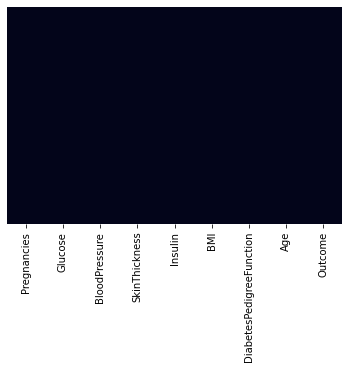

In [8]:
#heatmap showing the null values (there aren't any)
sns.heatmap(dataframe.isnull(),yticklabels=False,cbar=False)

In [9]:
#shape of dataset (rows,columns)
dataframe.shape

(768, 9)

In [10]:
#data types of dataset
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
#number of diabetic patients(outcome = 1) and non diabetic (outcome = 0)
dataframe.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

In [12]:
dataframe.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

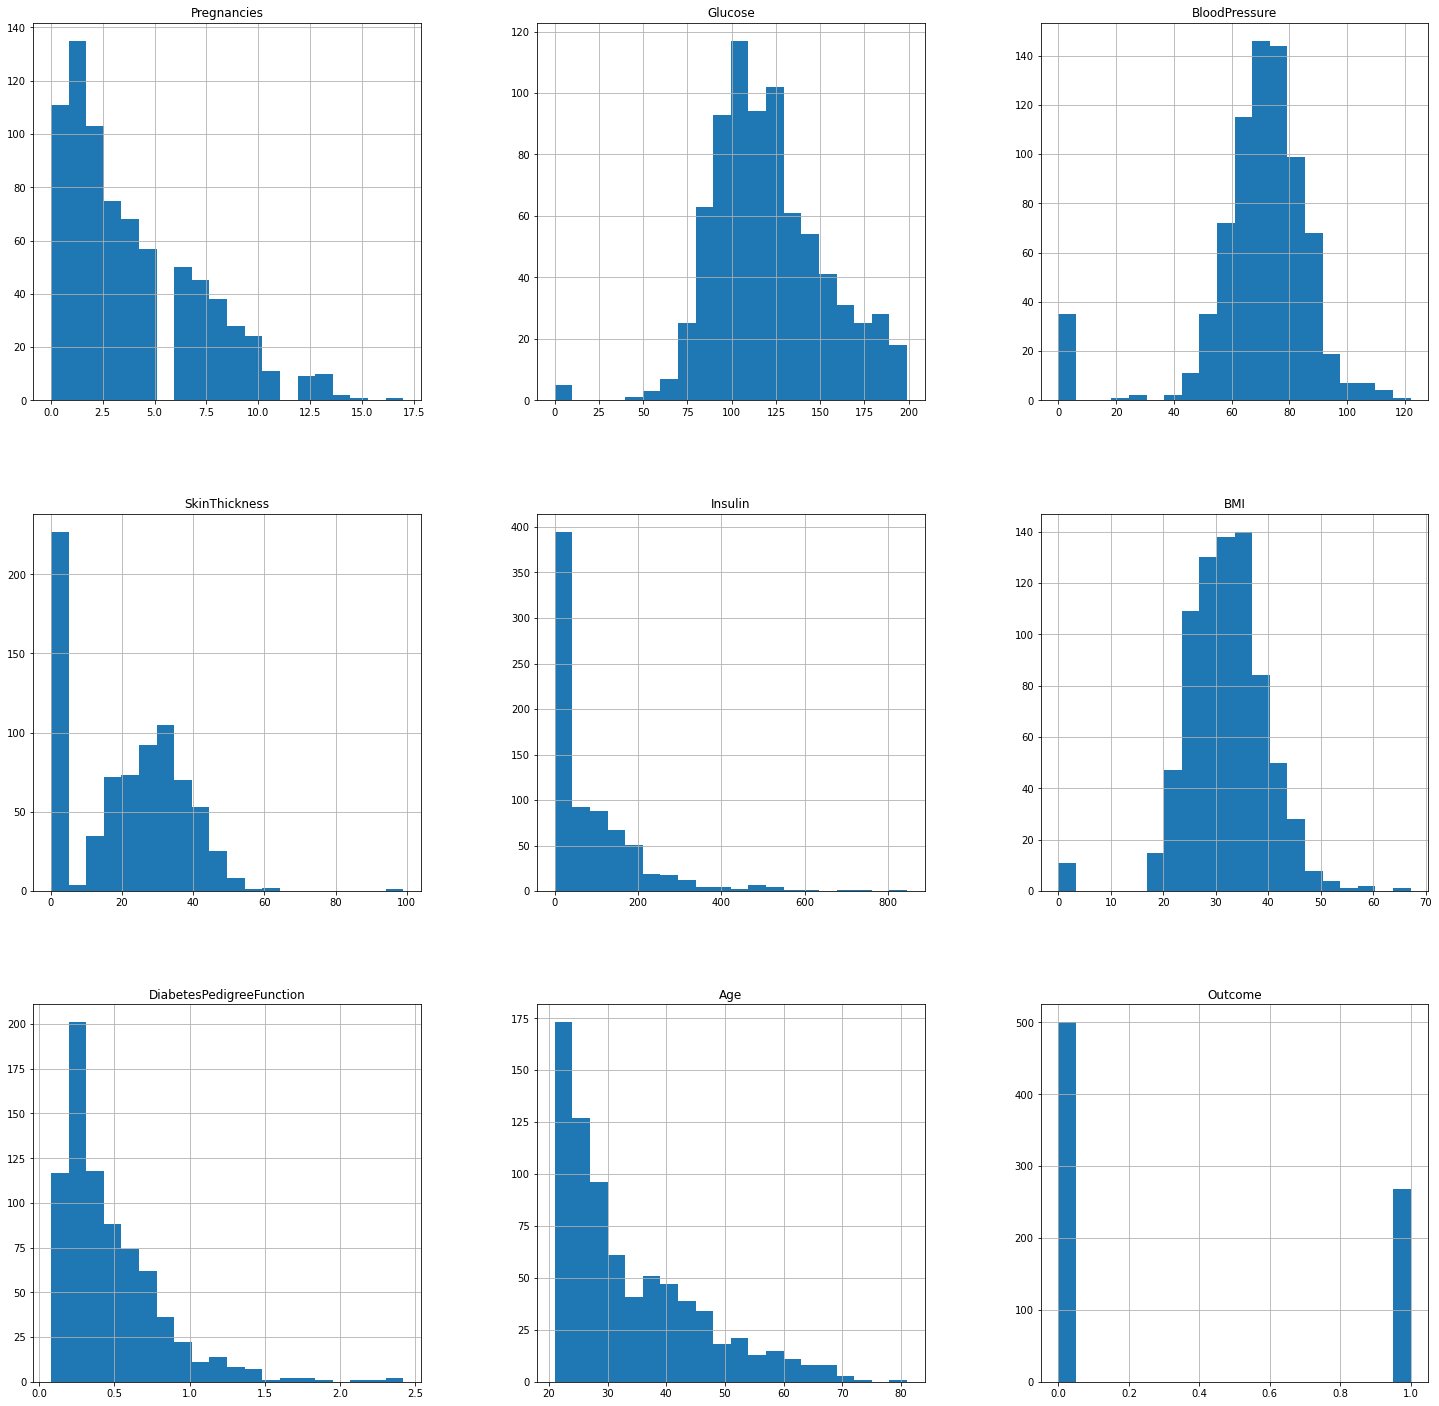

In [13]:
#data visualization
dataframe.hist(bins=20, figsize=(25, 25))
plt.show()

In [14]:
dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [15]:
#correlation of data
correlation = dataframe.corr()

<AxesSubplot:>

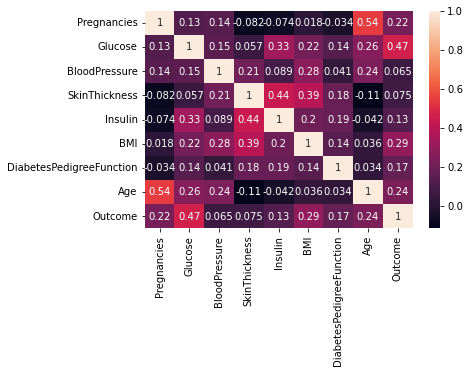

In [16]:
#correlation of data heatmap
sns.heatmap(correlation,annot=True)

In [17]:
### Cleaning the data

In [18]:
#Printing the minium values of datasets, thus checking for 0 values
print("Pregnancies = ", dataframe['Pregnancies'].min())
print("Glucose = ", dataframe['Glucose'].min())
print("BloodPressure = ", dataframe['BloodPressure'].min())
print("SkinThickness = ", dataframe['SkinThickness'].min())
print("Insulin = ", dataframe['Insulin'].min())
print("BMI = ", dataframe['BMI'].min())
print("DiabetesPedigreeFunction = ", dataframe['DiabetesPedigreeFunction'].min())
print("Age = ", dataframe['Age'].min())
print("Outcome = ", dataframe['Outcome'].min())


Pregnancies =  0
Glucose =  0
BloodPressure =  0
SkinThickness =  0
Insulin =  0
BMI =  0.0
DiabetesPedigreeFunction =  0.078
Age =  21
Outcome =  0


In [19]:
# Replacing 0 values with median not mean because the dataset is asymmetrical, except pregnancies 
dataframe['Glucose'] = dataframe['Glucose'].replace(to_replace=0,value=dataframe['Glucose'].median())
dataframe['BloodPressure'] = dataframe['BloodPressure'].replace(to_replace=0,value=dataframe['BloodPressure'].median())
dataframe['SkinThickness'] = dataframe['SkinThickness'].replace(to_replace=0,value=dataframe['SkinThickness'].median())
dataframe['Insulin'] = dataframe['Insulin'].replace(to_replace=0,value=dataframe['Insulin'].median())
dataframe['BMI'] = dataframe['BMI'].replace(to_replace=0,value=dataframe['BMI'].median())

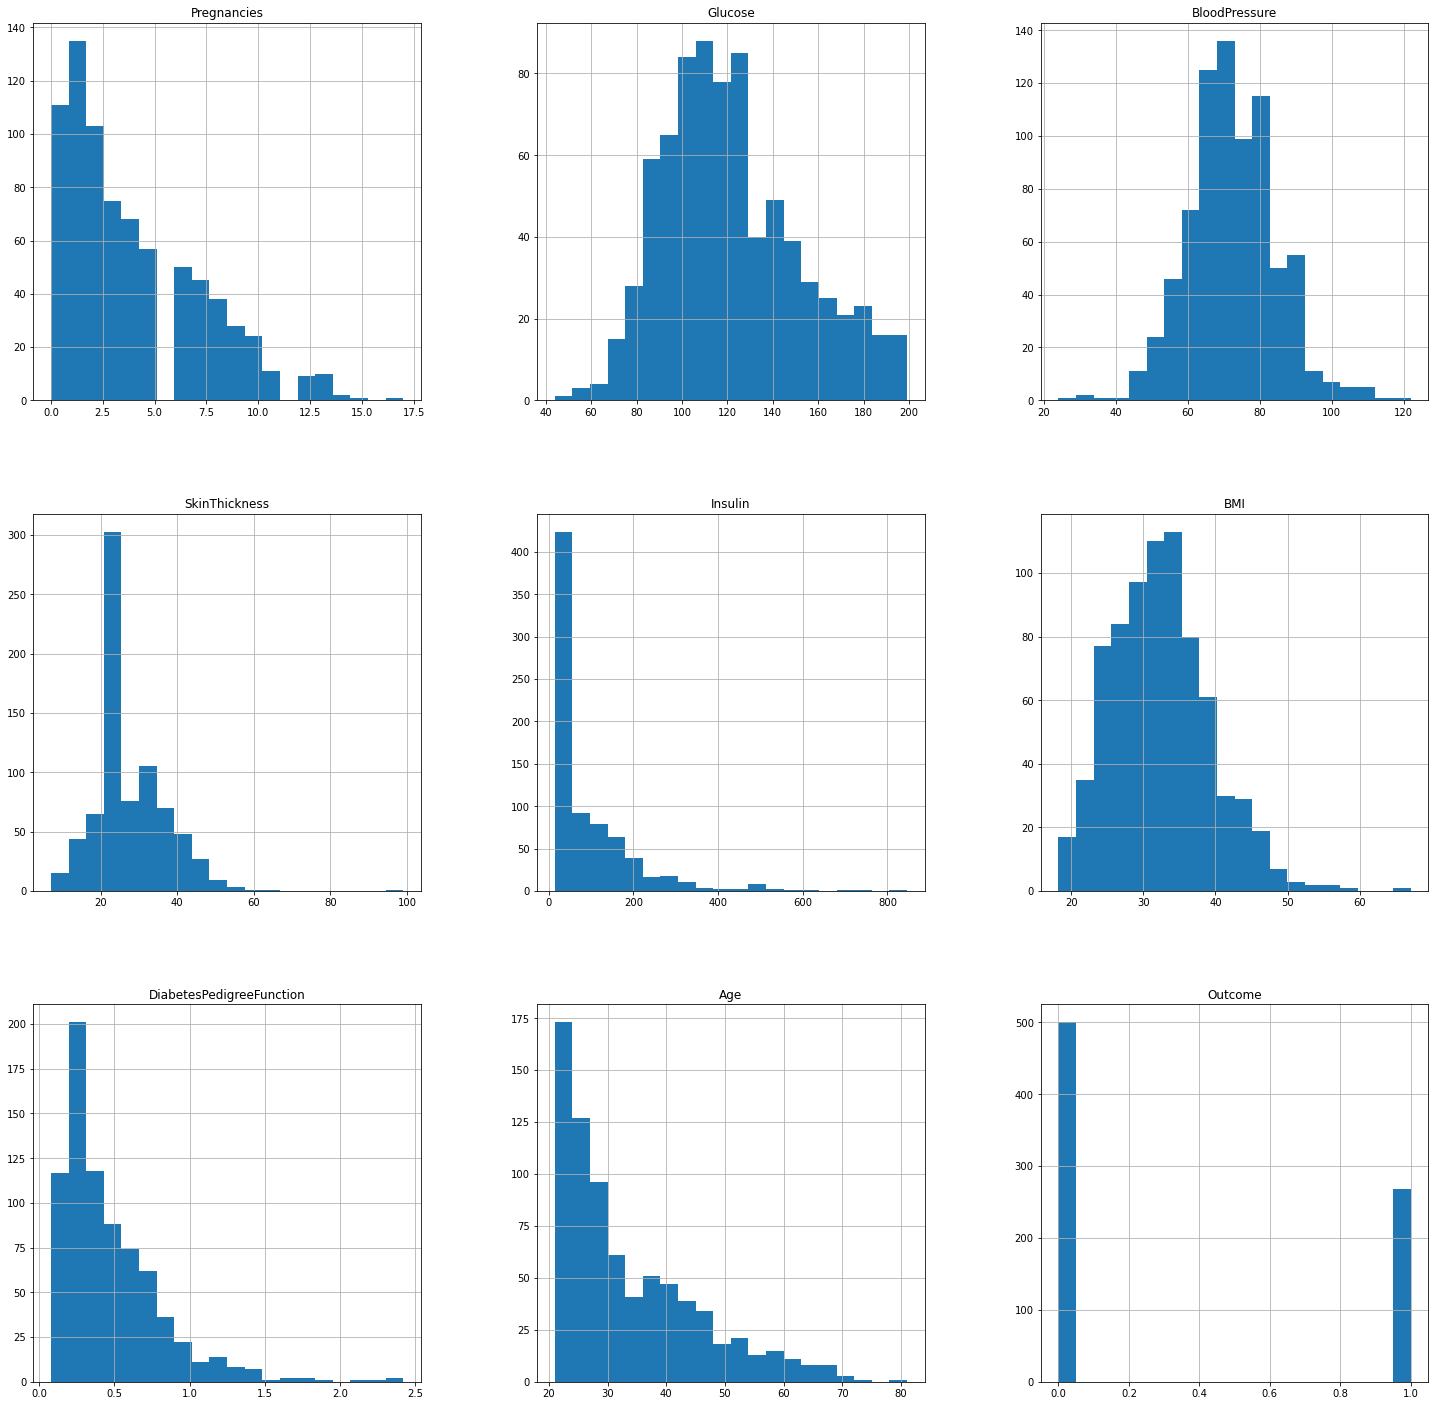

In [20]:
###Visualizing the data replace null with 0
dataframe.hist(bins=20, figsize=(25, 25))
plt.show()

In [21]:
####Feature Prepapration

In [22]:
#colums of the dataset
dataframe.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [23]:
dataframe.shape

(768, 9)

In [24]:
dataframe.iloc[:,0:8]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,30.5,33.6,0.627,50
1,1,85,66,29,30.5,26.6,0.351,31
2,8,183,64,23,30.5,23.3,0.672,32
3,1,89,66,23,94.0,28.1,0.167,21
4,0,137,40,35,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63
764,2,122,70,27,30.5,36.8,0.340,27
765,5,121,72,23,112.0,26.2,0.245,30
766,1,126,60,23,30.5,30.1,0.349,47


In [25]:
X_labels = dataframe.iloc[:,0:8]

In [26]:
y_labels = dataframe['Outcome']

In [27]:
#Scale dataset
from sklearn.preprocessing import MinMaxScaler as Scaler

In [28]:
scaler = Scaler()
X_df = scaler.fit_transform(X_labels)

In [29]:
X_df.shape

(768, 8)

In [30]:
X_df = pd.DataFrame(X_df,columns=labels[0:8])

In [31]:
X_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.670968,0.489796,0.304348,0.019832,0.314928,0.234415,0.483333
1,0.058824,0.264516,0.428571,0.239130,0.019832,0.171779,0.116567,0.166667
2,0.470588,0.896774,0.408163,0.173913,0.019832,0.104294,0.253629,0.183333
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000


In [32]:
#DataSet Splitting
X_train,X_test,y_train,y_test = train_test_split(X_df,y_labels,test_size=0.2,random_state=42)

In [33]:
X_train.shape

(614, 8)

In [34]:
X_test.shape

(154, 8)

In [35]:
y_train.shape

(614,)

In [36]:
y_test.shape

(154,)

In [37]:
# Create an instance of Logistic Regression Classifier and fit the Data and tunning hypothesis parameters
logit = LogisticRegression(C=1,solver='saga',verbose=0)
logit.fit(X_train,y_train)

LogisticRegression(C=1, solver='saga')

In [38]:
#Predict using test data set 
prediction = logit.score(X_test,y_test)

In [39]:
#Print accuracy of the trained model
print("Accuracy Score of Logisitic::",prediction)

Accuracy Score of Logisitic:: 0.7792207792207793


In [40]:
X_test.values[0]

array([0.35294118, 0.3483871 , 0.34693878, 0.2826087 , 0.21153846,
       0.32310838, 0.15029889, 0.36666667])

In [41]:
# Prediction on A Single Sample
logit.predict(np.array(X_test.values[2]).reshape(1,-1))

array([0], dtype=int64)

In [42]:
# !pip install shap
# Load ML Interpreting Models
import shap as sh
# Initialize JS For the Plot
sh.initjs()

In [43]:
explainer = sh.KernelExplainer(logit.predict_proba, X_train)

Using 614 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [44]:
plotValues = explainer.shap_values(X_test)

  0%|          | 0/154 [00:00<?, ?it/s]

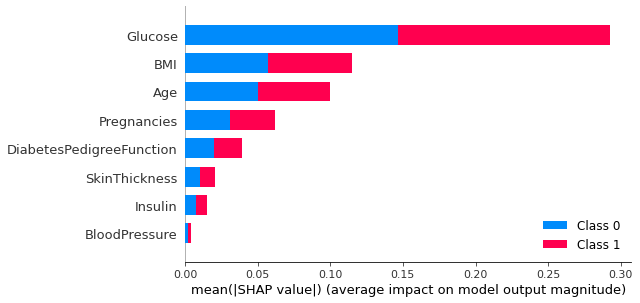

In [45]:
#Feature Summary
sh.summary_plot(plotValues,X_test)

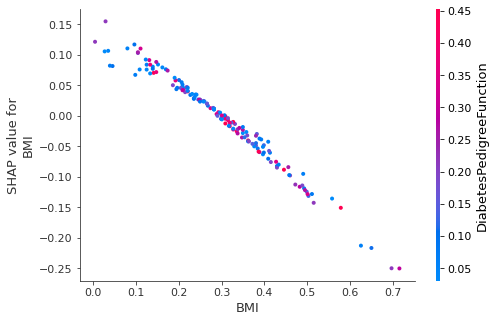

In [46]:
# BMI Concentration for diabeties BMI 
sh.dependence_plot(5,plotValues[0], X_test)

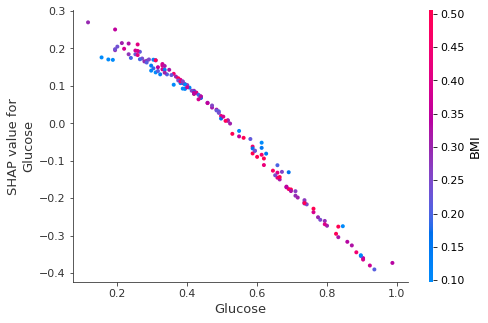

In [47]:
# Glucose Concentration for diabeties Glucose 
sh.dependence_plot(1,plotValues[0], X_test)